In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/bruno/miniconda3/envs/ocean/lib/python3.7/site-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "
/home/bruno/miniconda3/envs/ocean/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
nemo = xr.open_dataset('/home/bruno/git/pnas/nemo_data/temp_sites_100.nc')
nemo = nemo.reindex()
nemo.close()

/home/bruno/miniconda3/envs/ocean/lib/python3.7/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


1. Explorar as Dimensões Depth e Coordenadas
##### Verifique as dimensões e coordenadas principais dos arquivos:

In [ ]:
print(nemo.dims)
print(nemo.coords)


2. Verificar a Série Temporal
Confira as datas disponíveis

In [ ]:
print(nemo['time'])


In [ ]:
#Para verificar intervalos:

print(nemo['time'].min().values)
print(nemo['time'].max().values)


4. Explorar as Variáveis
Liste as variáveis disponíveis:

In [ ]:
print(nemo.data_vars)


#### Mapa de localização pontos bruv

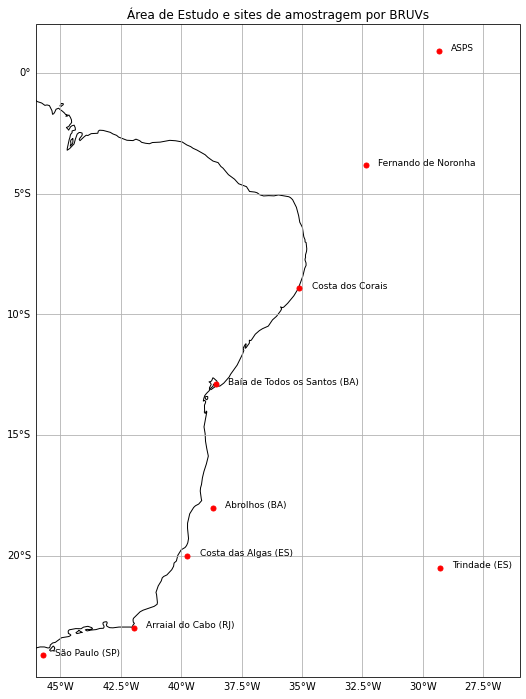

In [3]:
# Extraindo as coordenadas de latitude e longitude do dataset
lats = nemo['latitude'].values
lons = nemo['longitude'].values

# Dicionário de localizações
localizacoes = {
    "Abrolhos (BA)": (-18, -38.67),
    "Costa das Algas (ES)": (-19.99, -39.745),
    "Costa dos Corais": (-8.92, -35.11),
    "Arraial do Cabo (RJ)": (-22.99, -41.97),
    "ASPS": (0.91, -29.34),
    "Baía de Todos os Santos (BA)": (-12.90, -38.56),
    "Fernando de Noronha": (-3.83, -32.34),
    "São Paulo (SP)": (-24.11, -45.72),
    "Trindade (ES)": (-20.50, -29.30)
}

# Criar a figura e os subplots
fig = plt.figure(figsize=(10, 12))

# Mapa principal: Área de estudo
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.set_extent([lons.min(), -26, lats.min(), lats.max()])  # Ajuste para incluir até 26°W
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
gl = ax1.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax1.set_title('Área de Estudo e sites de amostragem por BRUVs')

# Adicionar pontos de localização e labels no mapa principal
for local, (lat, lon) in localizacoes.items():
    ax1.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax1.text(lon + 0.5, lat, local, fontsize=9, transform=ccrs.PlateCarree())

plt.show()


### Criando subset em netcdf para cada ponto do mapa anterior

O parâmetro buffer no código define um raio de busca ao redor de cada ponto de latitude e longitude. Ele expande a área de interesse para incluir dados adjacentes à localização central, considerando uma faixa ao redor do ponto especificado.

No exemplo, o buffer está ajustado para 0.5 graus, o que significa que o subset incluirá dados em uma faixa de ±0.5 graus tanto na latitude quanto na longitude. Esse valor pode ser ajustado conforme necessário para ampliar ou reduzir a área ao redor de cada ponto. Um buffer maior cobre uma área mais ampla, enquanto um buffer menor foca em áreas mais localizadas.
#### Exemplo:

 Se uma localização tiver coordenadas (lat=-18, lon=-38.67) e um buffer de 0.5, o subset incluirá dados entre as latitudes de -18.5 a -17.5 e longitudes de -39.17 a -38.17

In [5]:
subsets = {}

# Definir um raio de busca em torno de cada localização (em graus)
buffer = 0.5  # Ajuste esse valor conforme necessário

# Iterar sobre as localizações e criar subsets
for local, (lat, lon) in localizacoes.items():
    subset = nemo.sel(latitude=slice(lat-buffer, lat+buffer), longitude=slice(lon-buffer, lon+buffer))
    subsets[local] = subset  # Armazena o subset no dicionário
    
    # Exemplo de visualização rápida
    print(f"Subset para {local}:")
    print(subset)

Subset para Abrolhos (BA):
<xarray.Dataset>
Dimensions:    (depth: 22, latitude: 13, longitude: 12, time: 30)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 65.81 77.85 92.33
  * latitude   (latitude) float32 -18.5 -18.42 -18.33 ... -17.67 -17.58 -17.5
  * longitude  (longitude) float32 -39.17 -39.08 -39.0 ... -38.42 -38.33 -38.25
  * time       (time) datetime64[ns] 2021-07-01 2021-08-01 ... 2023-12-01
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Monthly mean fields for product GLOBAL_REANALYSIS_PHY_...
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MERCATOR GLORYS12V1
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    subset:source:     ARCO d

### Criando uma váriavel subset para cada localização

In [7]:

# Acessando o subset de "Abrolhos (BA)" e suas variáveis
abrolhos_subset = subsets["Abrolhos (BA)"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
algas_subset = subsets["Costa das Algas (ES)"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
corais_subset = subsets["Costa dos Corais"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
acabo_subset = subsets["Arraial do Cabo (RJ)"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
asps_subset = subsets["ASPS"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
bsantos_subset = subsets["Baía de Todos os Santos (BA)"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
fnoronha_subset = subsets["Fernando de Noronha"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
sp_subset = subsets["São Paulo (SP)"]
# Acessando o subset de "Abrolhos (BA)" e suas variáveis
trind_subset = subsets["Trindade (ES)"]

In [8]:
# Acessando a váriavel "thetao" em cada subset
abrolhos_tao = abrolhos_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
algas_tao = algas_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
corais_tao = corais_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
acabo_tao = acabo_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
asps_tao = asps_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
bsantos_tao = bsantos_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
fnoronha_tao = fnoronha_subset['thetao']
# Acessando a váriavel "thetao" em cada subset
sp_tao =sp_subset['thetao']
# Acessando a váriavel"thetao" em cada subset
trind_tao = trind_subset['thetao']

## 5. Visualização de Dados
Plote um gráfico simples para ver a amplitude dos dados e variações temporais:em todos os locais

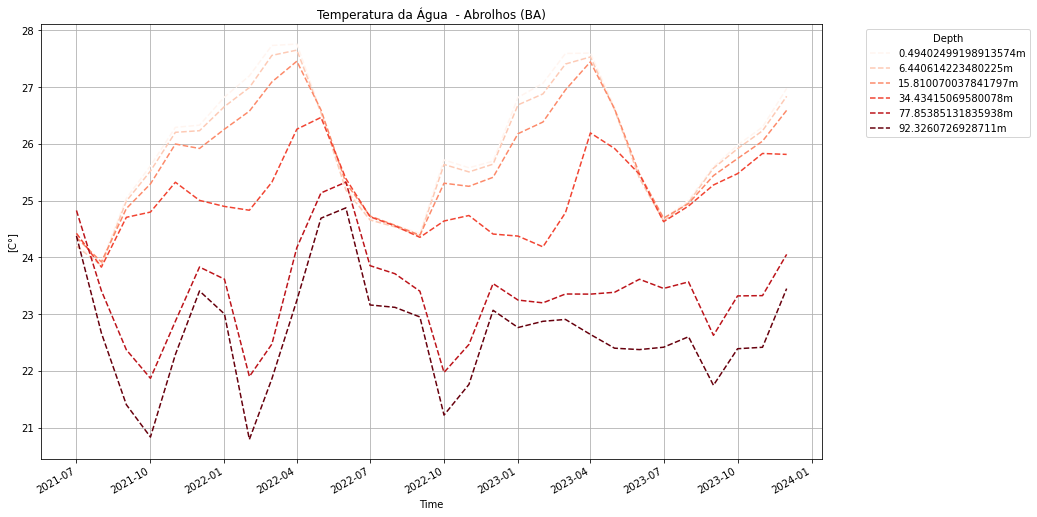

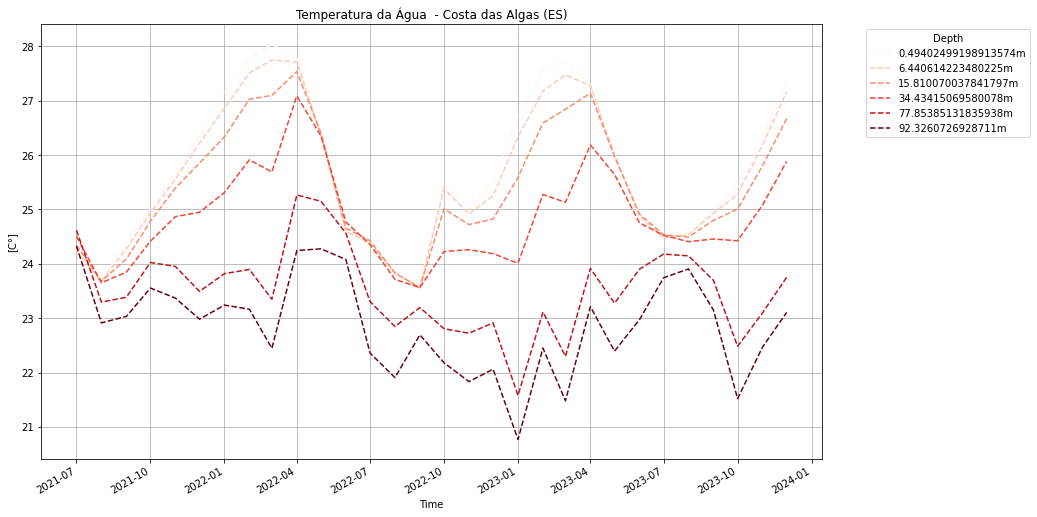

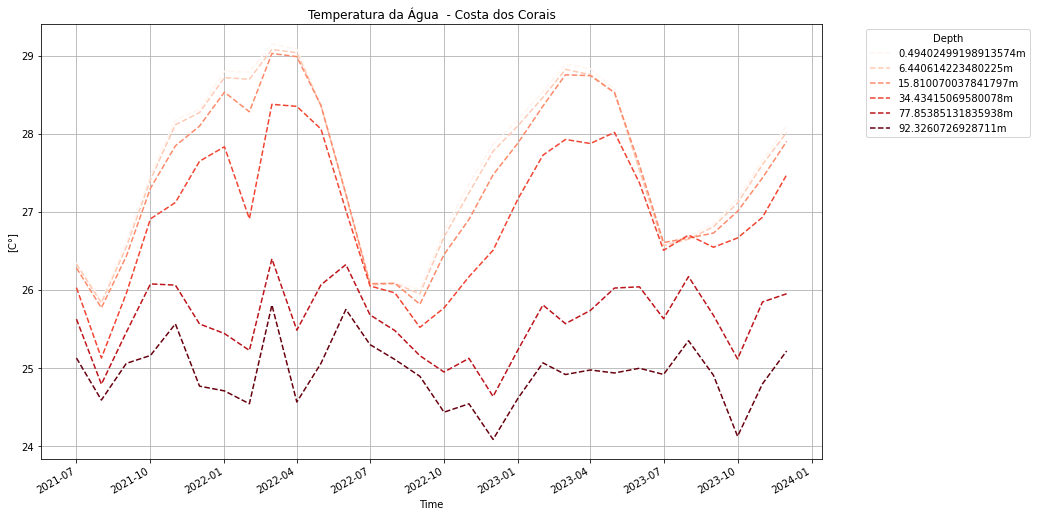

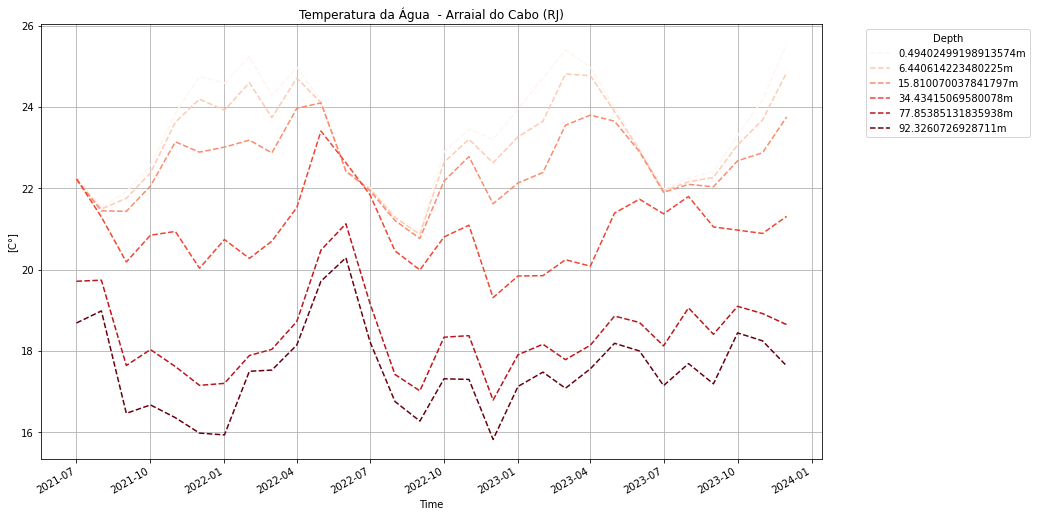

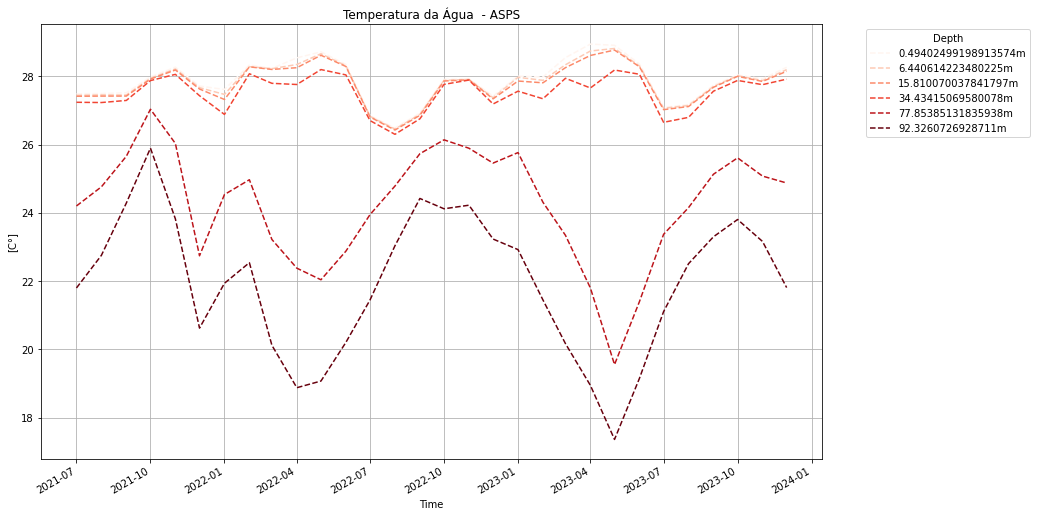

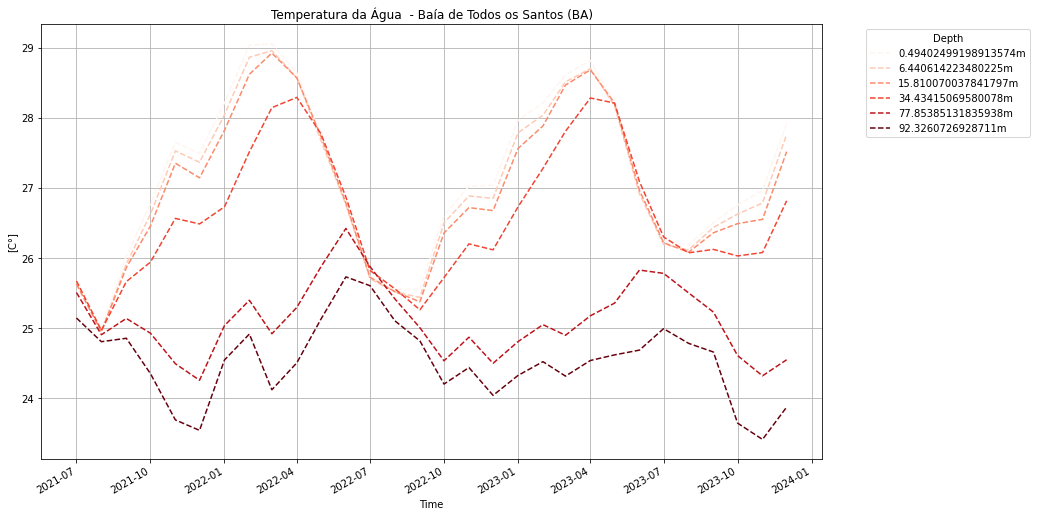

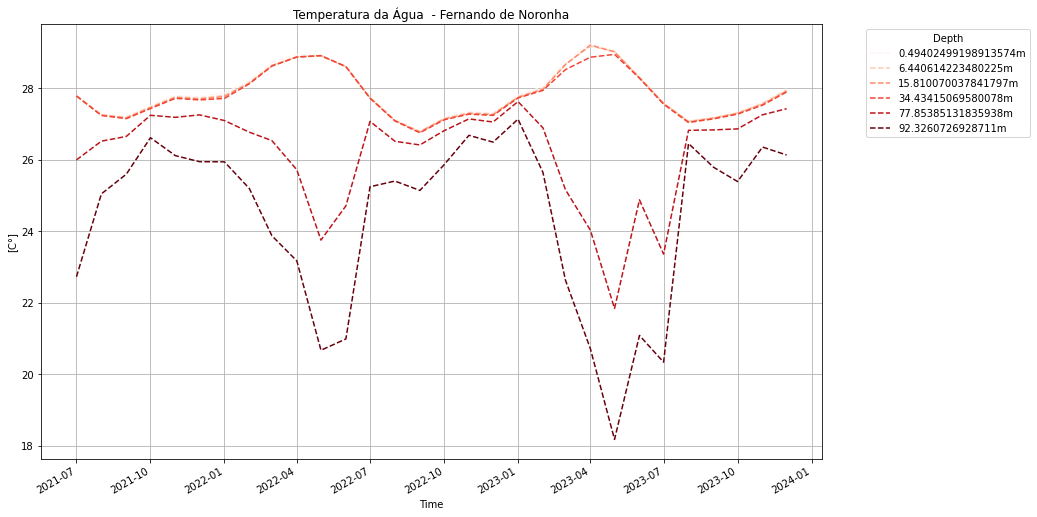

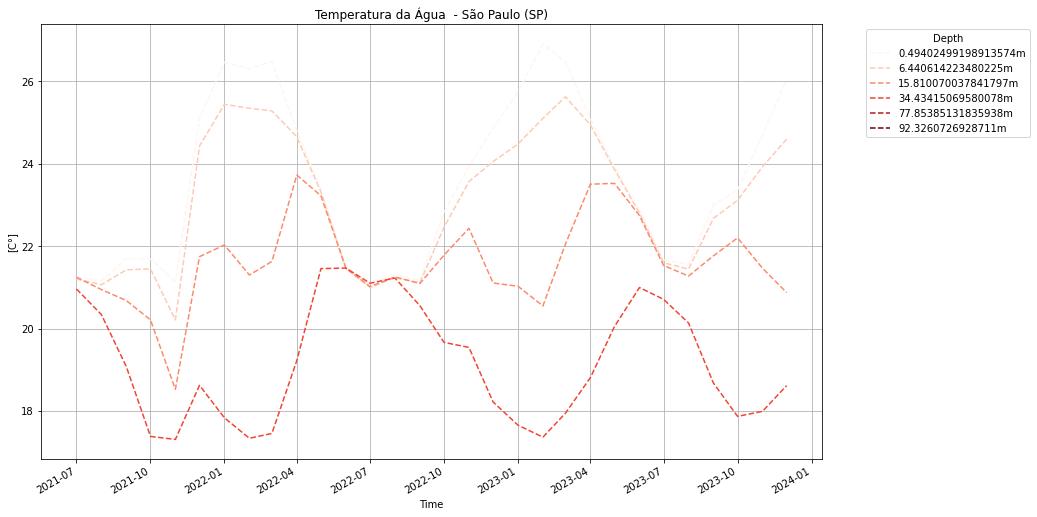

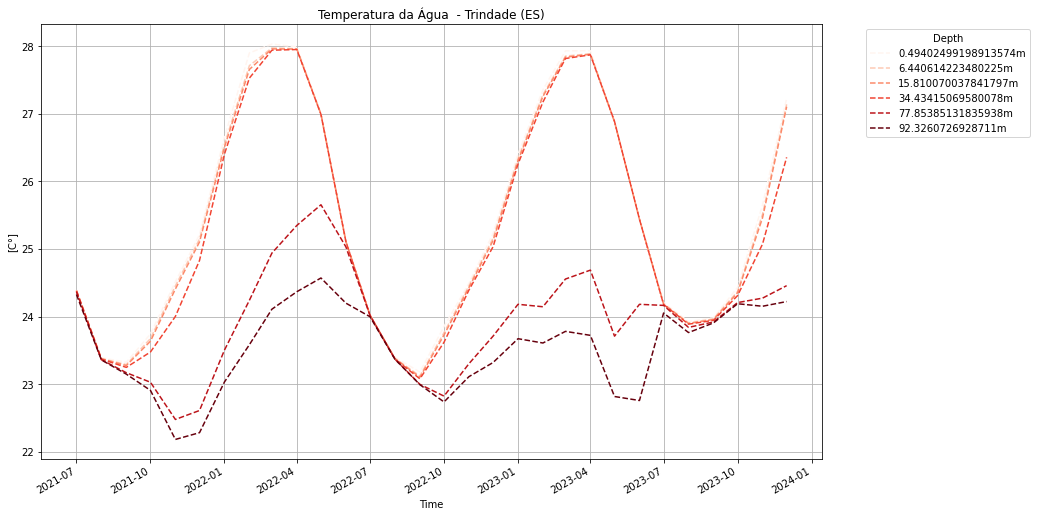

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Loop para gerar gráficos para cada local de interesse
for local, subset in subsets.items():
    # Configurar a figura
    plt.figure(figsize=(14, 8))

    # Profundidades reais correspondentes aos índices
    depth_indices = [0, 5, 10, 15, 20, 21]
    depths = subset['depth'].isel(depth=depth_indices).values
    colors = plt.cm.Reds(np.linspace(0, 1, len(depth_indices)))  # Gera uma lista de cores para variação de temperatura

    # Iterar sobre as profundidades e plotar em um único gráfico para cada subset
    for i, (index, depth, color) in enumerate(zip(depth_indices, depths, colors)):
        subset['thetao'].isel(depth=index).mean(dim=['latitude', 'longitude']).plot(label=f'{depth}m',
                                                                                   color=color, linestyle='--')

    # Configurar o gráfico
    plt.title(f'Temperatura da Água  - {local}')
    plt.xlabel('Time')
    plt.ylabel('[C°]')
    plt.grid(True)

    # Colocar a legenda fora da figura
    plt.legend(title='Depth', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Exibir o gráfico
    plt.show()


#### plote aqui a salinidade

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Configurar a figura
# plt.figure(figsize=(14, 8))

# # Profundidades reais correspondentes aos índices
# depth_indices = [0, 5, 10, 15, 20, 24]
# depths = nemo['depth'].isel(depth=depth_indices).values
# colors = plt.cm.PuBu(np.linspace(0, 1, len(depth_indices)))  # Gera uma lista de cores

# # Iterar sobre as profundidades e plotar em um único gráfico
# for i, (index, depth, color) in enumerate(zip(depth_indices, depths, colors)):
#     nemo['so'].isel(depth=index).mean(dim=['latitude', 'longitude']).plot(label=f'{depth}m',
#                                                                           color=color, linestyle='-')

# # Configurar o gráfico
# plt.title('Salinity at Different Depths')
# plt.xlabel('Time')
# plt.ylabel('Salinity (so)')
# plt.grid(True)

# # Colocar a legenda fora da figura
# plt.legend(title='Depth', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()


## Vamos aqui plotar uma seção vertical dos dados

1.Verifique as Profundidades Disponíveis:


In [ ]:
print(nemo['depth'])


2. Selecionar uma Localização para a Seção:

Escolha uma latitude e longitude específicas para criar a seção vertical, neste exemplo vamos escolher as coordenadas aproximadas de arraial do cabo

In [ ]:
lat_sel = nemo['latitude'].sel(latitude=chosen_lat)
lon_sel = nemo['longitude'].sel(longitude=chosen_lon)


3. Criar a Seção Vertical:
Selecione a temperatura ao longo da profundidade para o ponto escolhido:

In [ ]:
temp_section = nemo['thetao'].sel(latitude=lat_sel, longitude=lon_sel)


4. Plotar a Seção Vertical:


In [ ]:
temp_section.plot(y='depth', yincrease=False)  # yincrease=False para mostrar profundidade crescente para baixo
plt.show()


5. Plotar uma Seção Ao Longo de uma Linha (transecto):

Se quiser criar uma seção ao longo de uma linha (por exemplo, de uma latitude para outra):

#### temp_transect = nemo['thetao'].sel(longitude=chosen_lon).mean(dim='time')
temp_transect.plot(x='latitude', y='depth', yincrease=False)
plt.show()
